# Exploratory data analysis

In [1]:
from torchvision.transforms import Resize
from datasets.pneumonia_dataset import PneumoniaDataset
import matplotlib.pyplot as plt
from models.cnns import get_pretrained_rn_18

### Loading data

In [2]:
resize_transform = Resize((250,250)) # the images are large and have differing shapes
train_dataset = PneumoniaDataset("data/chest_xray/train", resize_transform)
val_dataset = PneumoniaDataset("data/chest_xray/val", resize_transform)

In [3]:
len(val_dataset)

16

### Visualising image examples

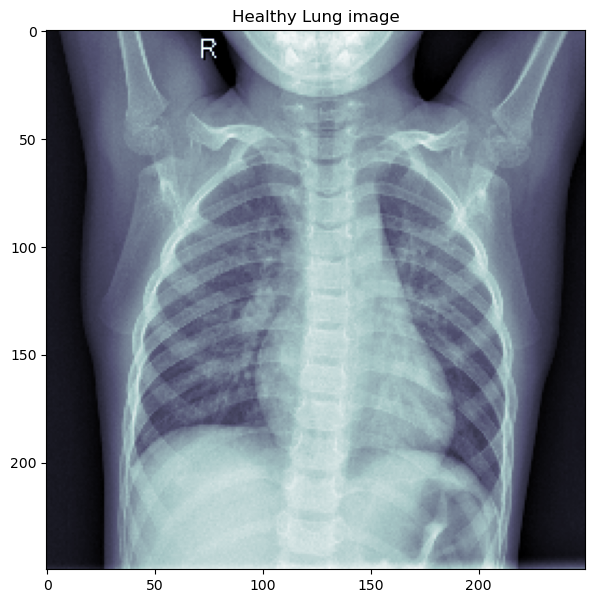

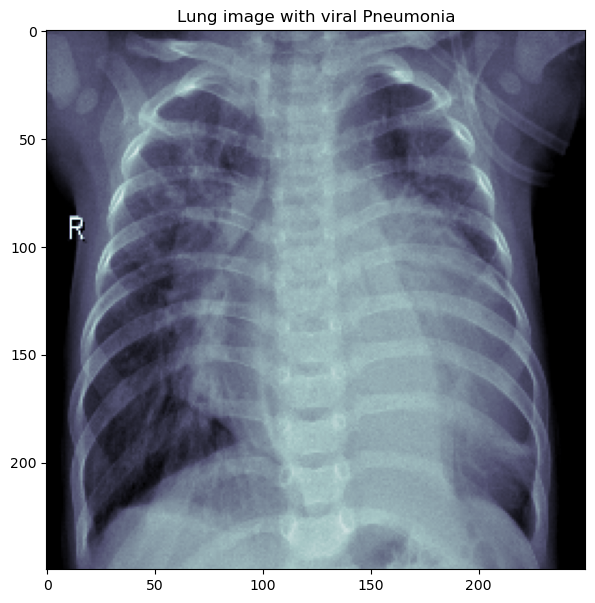

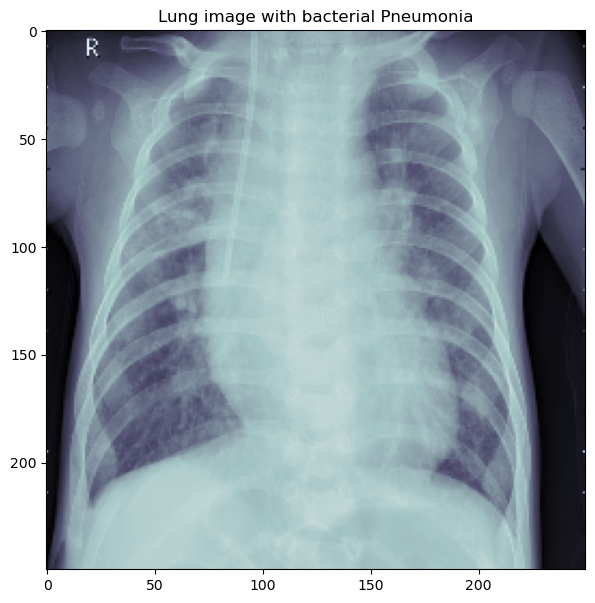

In [4]:
plt.figure(figsize = (7,7))
plt.imshow(train_dataset[0][0][0], cmap='bone')
plt.title("Healthy Lung image")

plt.figure(figsize = (7,7))
plt.imshow(train_dataset[-40][0][0], cmap='bone')
plt.title("Lung image with viral Pneumonia")

plt.figure(figsize = (7,7))
plt.imshow(train_dataset[-71][0][0], cmap='bone')
plt.title("Lung image with bacterial Pneumonia")
print()

### Visualising class counts

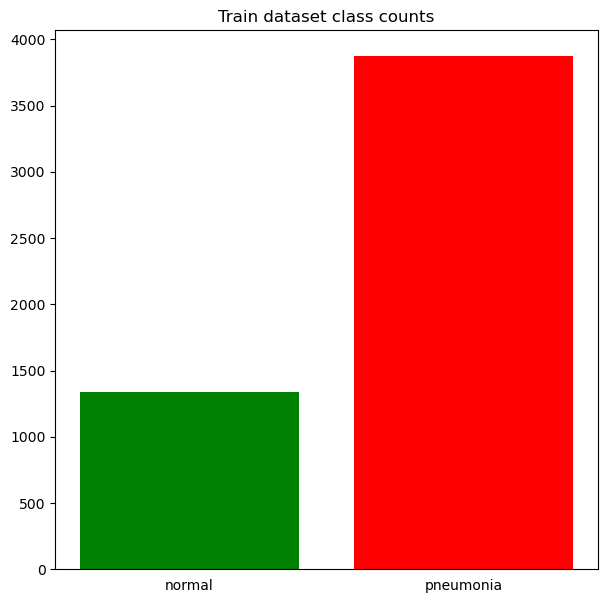

In [5]:
train_dataset_class_counts = [train_dataset.labels.count(class_label) for class_label in range(2)]

plt.figure(figsize = (7,7))
plt.bar(["normal", "pneumonia"], train_dataset_class_counts, color=['green', 'red'])
plt.tick_params(bottom = False)
plt.title("Train dataset class counts")
print()

### Preprocessing
Preprocessing is done in the `PneumoniaDataset` class. Namely the preprocessing consists of reshaping the images so that all of them have the same size and shape. Also, the luminosity values of the image are rescaled to the range [0,1] in order for the model to be able to learn more easily. *maybe try normalisation of values*

# Model
As our cnn model for creating prediction, we use a pre-trained resnet18 model that we will fine-tune on our dataset. We chose to go with a pretrained model to achieve higher accuracy and reduce training time. We chose resnet18 specifically over larger models because the dataset at hand is relatively small and we have only 2 classes

In [6]:
model = get_pretrained_rn_18()
model(train_dataset[0][0].unsqueeze(0)) # We will have to find a way to deal with 1-channel input

tensor([[0.0480]], grad_fn=<AddmmBackward0>)